In [19]:
import json
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.signal import argrelextrema

sys.path.append("../../")
import didgelab.calc.fft
from didgelab.calc.sim.sim import *
from didgelab.calc.fft import *
from didgelab.app import get_app
from didgelab.initializer import init_console_no_output
from didgelab.calc.geo import Geo
init_console_no_output()

da_path = "/Users/jane03/workspaces/music/didge/didge-archive"
didge_archive = json.load(open(os.path.join(da_path, "didge-archive.json")))
didge_archive = list(filter(lambda x:x["shape"] == "straight", didge_archive))


In [6]:
tamaki = didge_archive[4]
tamaki

{'name': 'Tamaki1',
 'audio-samples': {'neutral-sound': 'audio-samples/tamaki1-short.wav',
  'song': 'audio-samples/tamaki1-long.wav'},
 'geometry': 'geometries/tamaki1.json',
 'shape': 'straight'}

In [13]:
geo = Geo(json.load(open(os.path.join(da_path, tamaki["geometry"]))))

tamaki_sample = os.path.join(da_path, tamaki["audio-samples"]["neutral-sound"])
tamaki_sample

'/Users/jane03/workspaces/music/didge/didge-archive/audio-samples/tamaki1-short.wav'

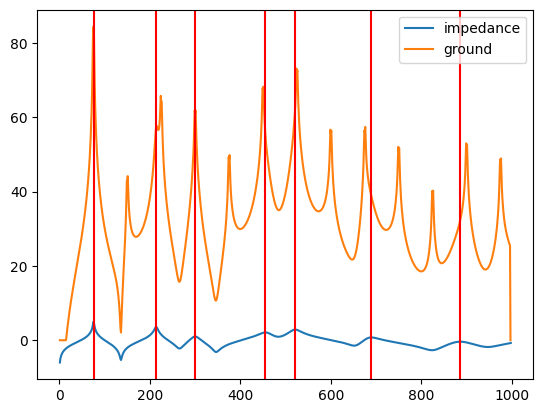

In [81]:
fmin=1
fmax=1000
freqs = get_log_simulation_frequencies(fmin, fmax, 5)
segments = create_segments(geo)
impedance = compute_impedance(segments, freqs)
ground_freqs, imp_ip = interpolate_spectrum(freqs, impedance)
ground = compute_ground_spektrum(ground_freqs, imp_ip)

impedance = np.log2(impedance)

plt.plot(freqs, impedance, label="impedance")
plt.plot(ground_freqs, ground, label="ground")

imp_extrema = freqs[argrelextrema(impedance, np.greater)[0]]

# take the higest extrema only
#f1 = ground_extrema[0]
#filtered = [extrema_freqs[np.abs(extrema_freqs-ground_freqs[extrema])<f1*0.5] for extrema in ground_extrema]
#filtered = np.unique([x[np.argmax(ground[x])] for x in filtered])
#filtered = ground_freqs[filtered]

for e in imp_extrema:
    plt.axvline(x=e, color="red")

plt.legend()

In [66]:
indizes = np.arange(len(ground_extrema))
extrema_freqs = ground_freqs[ground_extrema]
filtered_extrema = []
for freq in extrema_freqs:
    close = indizes[np.abs(extrema_freqs-freq)<f1*0.5]
    close = close[np.argmax(ground[ground_extrema[close]])]
    print(close)
    #print(freq, ground_freqs[ground_extrema[close]])
    #close = indizes[np.abs(ground_extrema-ground_freqs[ground_extrema[i]]) < 3]

0
2
2
4
4
4
6
6
9
9
11
11
12
12
14
14
17
17
18
18
21
21
22
22
25
25


In [76]:
filtered = [extrema_freqs[np.abs(extrema_freqs-ground_freqs[extrema])<f1*0.5] for extrema in ground_extrema]
filtered = np.unique([x[np.argmax(ground[x])] for x in filtered])
filtered = ground_freqs[filtered]
filtered

array([ 77, 150, 225, 300, 375, 450, 525, 600, 675, 750, 825, 900, 975])

In [53]:
ground_extrema

array([ 75, 148, 150, 214, 223, 225, 298, 300, 373, 375, 448, 450, 523,
       525, 598, 600, 673, 675, 748, 750, 823, 825, 898, 900, 973, 975])

In [44]:
ground_freqs[ground_extrema[3]]

215